In [233]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
df = pd.read_csv("../Link-Feedback -august-dump (1).csv")
os = "Android"
df = df[df["Device OS"].str.contains(os)]
s = df["Version Name"].value_counts()
s = s.loc[lambda x: x > 2].index
versions = pd.Series(s).iloc[::-1]
# for i inarr:
# df[df["Version Name"].str.contains("2.16")]["Rating"].value_counts()[2.0]

    # print(i)

Total rating 1 for 2.14.2 is: 1 adding...
Total rating 1 for 2.15.2 is: 1 adding...
Total rating 1 for 2.16 is: 28 adding...
Total rating 1 for 2.16.1 is: 134 adding...


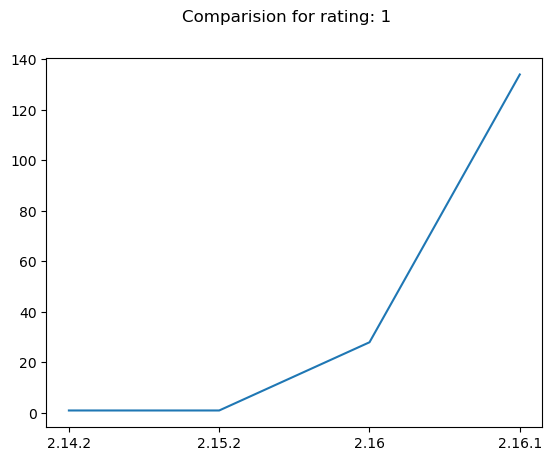

In [234]:

def rating_count(version, rating):
    return df[df["Version Name"].str.strip() == version]["Rating"].value_counts()[rating]
def rating_chart(rating):
    dict = {}
    for v in versions:
        try:
            rate = rating_count(v, rating)
            print("Total rating " + str(rating) + " for " + v + " is: " + str(rate) + " adding...")
            dict[v] = rate 
        except: 
            print("No value for: " + str(v) + " with rating: " + str(rating))
            # do nothing
    plt.plot(dict.keys(), dict.values())
    plt.suptitle("Comparision for rating: " + str(rating))
    # plt.bar(dict.keys(), dict.values(), width=0.2)
    plt.show()

rating_chart(1)

No value for: 2.14.2 with rating: 2
Total rating 2 for 2.15.2 is: 1 adding...
Total rating 2 for 2.16 is: 10 adding...
Total rating 2 for 2.16.1 is: 80 adding...


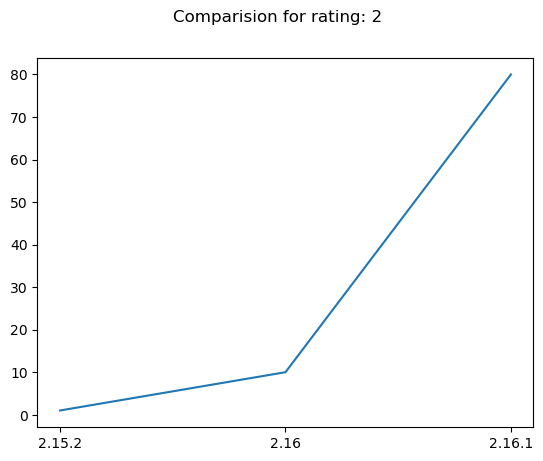

In [235]:
rating_chart(2)

No value for: 2.14.2 with rating: 0
No value for: 2.15.2 with rating: 0
Total rating 0 for 2.16 is: 2 adding...
Total rating 0 for 2.16.1 is: 19 adding...


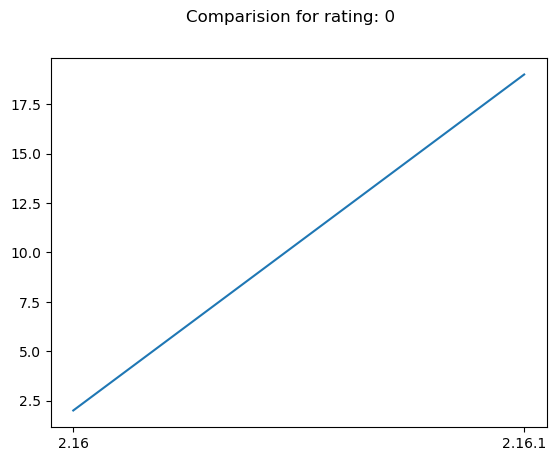

In [236]:
rating_chart(0)

No value for: 2.14.2 with rating: 3
No value for: 2.15.2 with rating: 3
Total rating 3 for 2.16 is: 11 adding...
Total rating 3 for 2.16.1 is: 85 adding...


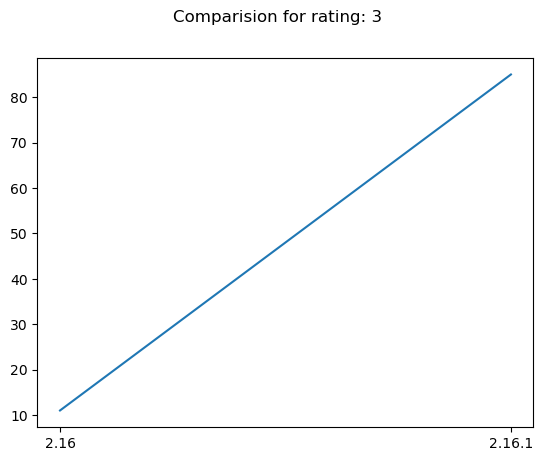

In [241]:
rating_chart(3)

Adding 1 to 2.14.2
Adding 1 to 2.15.2
Adding 48 to 2.16
Adding 289 to 2.16.1


/var/folders/51/84hdslm55t33tx1py28cg68wm50k1q/T/ipykernel_17184/4258068571.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newDf2 = newDf[df["Version Name"].str.strip() == v]
/var/folders/51/84hdslm55t33tx1py28cg68wm50k1q/T/ipykernel_17184/4258068571.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newDf2 = newDf[df["Version Name"].str.strip() == v]
/var/folders/51/84hdslm55t33tx1py28cg68wm50k1q/T/ipykernel_17184/4258068571.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newDf2 = newDf[df["Version Name"].str.strip() == v]
/var/folders/51/84hdslm55t33tx1py28cg68wm50k1q/T/ipykernel_17184/4258068571.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newDf2 = newDf[df["Version Name"].str.strip() == v]


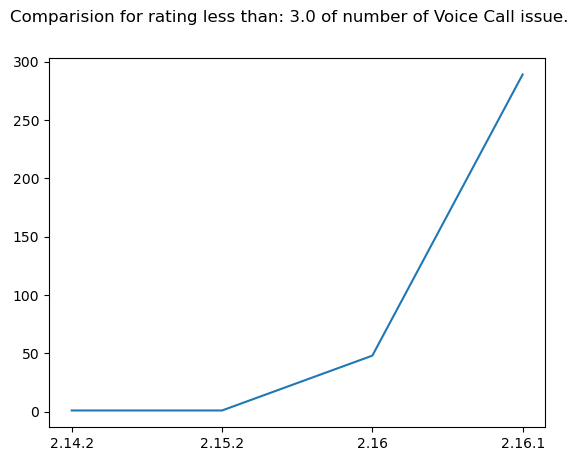

In [240]:
df[df["Version Name"].str.contains("2.16")]["Event"].value_counts()


def issuetype_chart(rating, type, column):
    dict = {}
    for v in versions:
       newDf = df[df["Rating"] <= rating]
       newDf2 = newDf[df["Version Name"].str.strip() == v]
       s = newDf2[column].value_counts().sort_index()
       print("Adding " + str(s[type]) + " to " + v)
       dict[v] = s[type]

    plt.plot(dict.keys(), dict.values())
    plt.suptitle("Comparision for rating less than: " + str(rating) + " of number of " + str(type) + " issue.")
    # plt.bar(dict.keys(), dict.values(), width=0.2)
    plt.show()
    
issuetype_chart(3.0, "Voice Call", "Event")
# newDf = df[df["Rating"] <= 3.0]
# newDf2 = newDf[df["Version Name"].str.strip() == "2.16.1"]
# s = newDf2["Event"].value_counts().sort_index()
# s["Voice Call"]


Total rating lesser 3.0 for 2.14.2 is: 1 adding...
Total rating lesser 3.0 for 2.15.2 is: 2 adding...
Total rating lesser 3.0 for 2.16 is: 51 adding...
Total rating lesser 3.0 for 2.16.1 is: 318 adding...


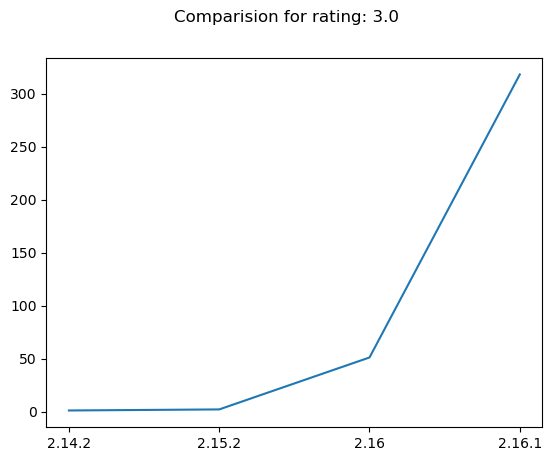

In [263]:
def rating_count_lesser(version, rating):
    s = df[df["Version Name"].str.strip() == version]
    count = len(s[s["Rating"] <= rating])
    return count


def rating_chart_lesser(rating):
    dict = {}
    for v in versions:
        try:
            rate = rating_count_lesser(v, rating)
            print("Total rating lesser " + str(rating) + " for " + v + " is: " + str(rate) + " adding...")
            dict[v] = rate 
        except: 
            print("No value for: " + str(v) + " with rating: " + str(rating))
            # do nothing
    plt.plot(dict.keys(), dict.values())
    plt.suptitle("Comparision for rating: " + str(rating))
    # plt.bar(dict.keys(), dict.values(), width=0.2)
    plt.show()

# t = rating_count_greater("2.16", 3.0)
rating_chart_lesser(3.0)

Total rating lesser 4.0 for 2.14.2 is: 2 adding...
Total rating lesser 4.0 for 2.15.2 is: 3 adding...
Total rating lesser 4.0 for 2.16 is: 81 adding...
Total rating lesser 4.0 for 2.16.1 is: 522 adding...


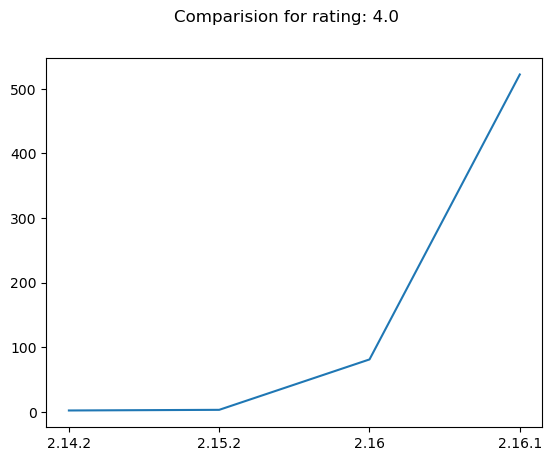

In [264]:
def rating_count_greater(version, rating):
    s = df[df["Version Name"].str.strip() == version]
    count = len(s[s["Rating"] >= rating])
    return count


def rating_chart_greater(rating):
    dict = {}
    for v in versions:
        try:
            rate = rating_count_lesser(v, rating)
            print("Total rating lesser " + str(rating) + " for " + v + " is: " + str(rate) + " adding...")
            dict[v] = rate 
        except: 
            print("No value for: " + str(v) + " with rating: " + str(rating))
            # do nothing
    plt.plot(dict.keys(), dict.values())
    plt.suptitle("Comparision for rating: " + str(rating))
    # plt.bar(dict.keys(), dict.values(), width=0.2)
    plt.show()

# t = rating_count_greater("2.16", 3.0)
rating_chart_greater(4.0)